In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import matplotlib.ticker as ticker
import csv

In [2]:
def read_result():
    # Initialize an empty dictionary
    data_dict = {}

    # Reading the data from a CSV file
    with open('./output.csv', mode='r') as file:
        reader = csv.reader(file)
        
        # Read the header (keys)
        keys = next(reader)
        keys = [float(key) for key in keys]  # Convert keys to float if necessary
        
        # Initialize the dictionary with keys and empty lists
        for key in keys:
            data_dict[key] = []
        
        # Read each row and append the values to the corresponding key in the dictionary
        for row in reader:
            for i, key in enumerate(keys):
                data_dict[key].append(float(row[i]))  # Convert values to float if necessary

    return data_dict
    
# read_result()

In [5]:
def plot_tfs_detection_time_impact(fs=[24,20]):

    lens=[0.2, 0.4, 1.0, 2.0]
    res = read_result()
    x_labels = list(res.keys())
    print(lens)
    
    # Organize the data
    
    all_data = [res[dt] for dt in x_labels]
    
    # Settings
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    hatches = ['////', 'XX', '\\\\\\\\', '..']
    bar_width = 0.2
    x = np.arange(len(x_labels))

    # Plot
    fig, ax = plt.subplots(figsize=(10,4))

    for i, time in enumerate(lens):
        bar_positions = x + i * bar_width - bar_width * 1.5  # Adjust positions
        bar_values = [all_data[j][i] for j in range(len(x_labels))]
        ax.bar(bar_positions, bar_values, bar_width, label=f'n = {int(time/0.2)} ({time}s)', color=colors[i], hatch=hatches[i], edgecolor='black', zorder=2)
        # ax.bar(bar_positions, bar_values, bar_width, color=colors, edgecolor='black', hatch=hatches[i])


    # Plotting the first subplot
    # bars1 = ax1.bar(np.arange(4), res, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], width=0.4, label=[f't = {l}s'for l in len])
    # Adding labels and title
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel('Error of t* (\u0394t)', fontsize=fs[0])
    ax.set_ylabel('Accuarcy (%)', fontsize=fs[0])
    # ax.set_title(f'Impact of detection errors & identification time', fontsize=20)
    # ax.set_ylim(0, 20)  # Set y-axis limits to show percentages up to 100%
    ax.set_xticks(x)
    ax.set_xticklabels(f'{xlabel}s' for xlabel in x_labels)
    ax.xaxis.set_tick_params(labelsize=fs[1])
    ax.yaxis.set_tick_params(labelsize=fs[1])
    ax.legend(fontsize=fs[1], loc='lower right')

    # # Create custom legend handles with no fill color
    # from matplotlib.patches import Patch
    # legend_handles = [Patch(facecolor='none', edgecolor='black', hatch=hatches[i], label=f't = {x_labels[i]}s') for i in range(len(x_labels))]
    # # legend_handles = [Patch(facecolor='none', color=colors[i], edgecolor='black', label=f't = {x_labels[i]}s') for i in range(len(x_labels))]

    # # Apply custom legend to the plot
    # ax.legend(handles=legend_handles, fontsize=16)
    
    plt.grid(zorder=0)
    plt.tight_layout()
    plt.show()


[0.2, 0.4, 1.0, 2.0]


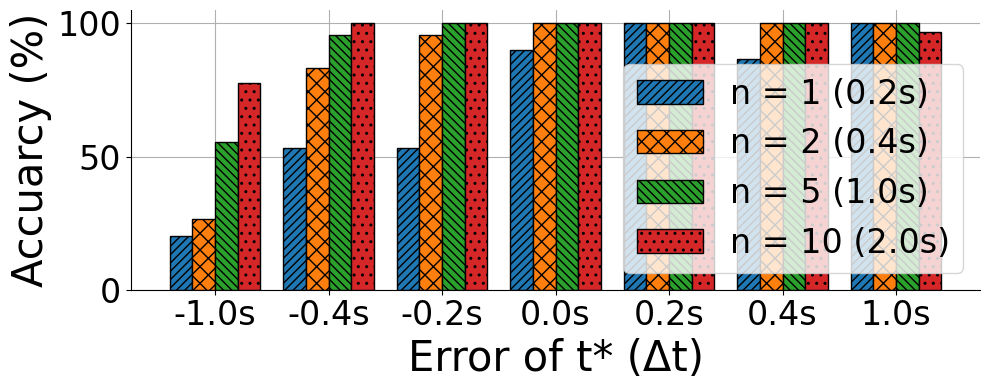

[0.2, 0.4, 1.0, 2.0]


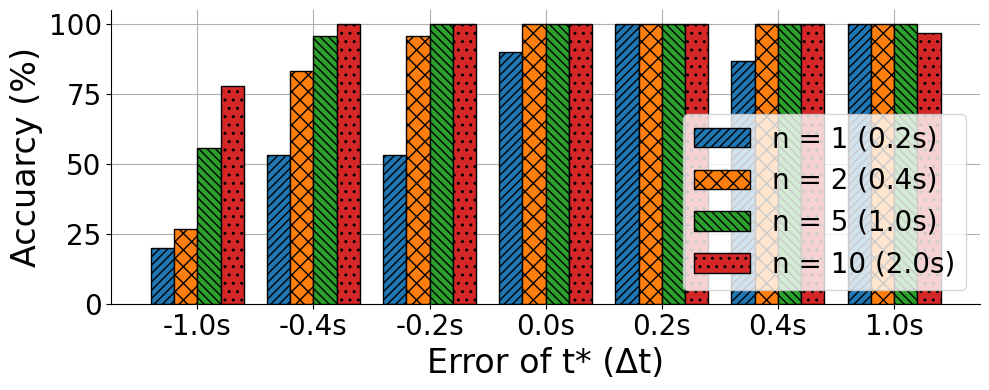

In [6]:
plot_tfs_detection_time_impact(fs=[30,24])
plot_tfs_detection_time_impact(fs=[24,20])